# Titanic Classification Model

### The purpose of this report is to build a classification model to predict passengers survivals on Titanic.

#### Let's start by downloading and exploring the dataset.

In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [65]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
print('train_data consist of {} rows & {} columns'.format(train_data.shape[0], train_data.shape[1]))
train_data.head()

train_data consist of 891 rows & 12 columns


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['Age'] = train_data['Age'].astype(int)
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].value_counts().index[0])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [68]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

let's add a new column 'Title' from the 'Name column'

In [69]:
import string

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    print (big_string)
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']
train_data['Title']=train_data['Name'].map(lambda x: substrings_in_string(x, title_list))

In [70]:
train_data['Title'].value_counts()

Mr          518
Miss        180
Mrs         129
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          1
Countess      1
Jonkheer      1
Don           1
Mme           1
Capt          1
Ms            1
Name: Title, dtype: int64

Replace titles with (Mr, Mrs, Miss) only

In [71]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
train_data['Title'] = train_data.apply(replace_titles, axis=1)

In [72]:
train_data['Title'].value_counts()

Mr        531
Miss      182
Mrs       138
Master     40
Name: Title, dtype: int64

Now let's add 'Deck' column based on Cabin No. from 'Cabin column.

In [73]:
train_data.Cabin = train_data.Cabin.fillna('Unknown')
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
train_data['Deck']=train_data['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare    Cabin Embarked Title     Deck  
0      0         A/5 21171   7.2500  Unknown        S    Mr  Unknown  
1      0          PC 17599  71.2833      C85        C   Mrs        C  
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss  Unknown  
3      0            113803  53.1000     C123        S   Mrs        C  
4      0            373450   8.0500  Unknown        S    Mr  Unknown

Creating a new Family_Size Column.

In [74]:
train_data['Family_Size']=train_data['SibSp']+train_data['Parch']
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare    Cabin Embarked Title     Deck  \
0      0         A/5 21171   7.2500  Unknown        S    Mr  Unknown   
1      0          PC 17599  71.2833      C85        C   Mrs        C   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss  Unknown   
3      0            113803  53.1000     C123        S   Mrs        C   
4      0            373450   8.0500  Unknown        S    Mr  Unknown   

   Family_Size  
0            1  
1            1  
2            0  
3            1  
4            0

Let's create Fare_per_Person column.

In [75]:
train_data['Fare_Per_Person']=train_data['Fare']/(train_data['Family_Size']+1)
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare    Cabin Embarked Title     Deck  \
0      0         A/5 21171   7.2500  Unknown        S    Mr  Unknown   
1      0          PC 17599  71.2833      C85        C   Mrs        C   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss  Unknown   
3      0            113803  53.1000     C123        S   Mrs        C   
4      0            373450   8.0500  Unknown        S    Mr  Unknown   

   Family_Size  Fare_Per_Person  
0            1          3.62500  
1            1         35.64165  
2            0          7.92500  
3            1         26.55000  
4            0          8.05000

let's create a data frame report to check features nature and correlation.

In [76]:
import pandas_profiling as pp
pp.ProfileReport(train_data)

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Now let's download and prepare test data.

In [77]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
print('test_data consist of {} rows & {} columns'.format(test_data.shape[0], test_data.shape[1]))
test_data.head()

test_data consist of 418 rows & 11 columns


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [78]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [79]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

test_data.Cabin = test_data.Cabin.fillna('Unknown')
test_data['Deck']=test_data['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Deck         418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [80]:
test_data['Title']=test_data['Name'].map(lambda x: substrings_in_string(x, title_list))
test_data['Title'] = test_data.apply(replace_titles, axis=1)
test_data['Family_Size']=test_data['SibSp']+test_data['Parch']
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare    Cabin Embarked     Deck Title  \
0  34.5      0      0   330911   7.8292  Unknown        Q  Unknown    Mr   
1  47.0      1      0   363272   7.0000  Unknown        S  Unknown   Mrs   
2  62.0      0      0   240276   9.6875  Unknown        Q  Unknown    Mr   
3  27.0      0      0   315154   8.6625  Unknown        S  Unknown    Mr   
4  22.0      1      1  3101298  12.2875  Unknown        S  Unknown   Mrs   

   Family_Size  
0            0  
1            1  
2            0  
3            0  
4            2

#### Analysis & Insights.

let's visualize some features to check it's distribution.

<AxesSubplot:xlabel='Survived', ylabel='count'>

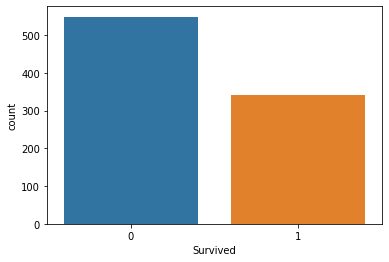

In [81]:
import seaborn as sns
sns.countplot(x='Survived',data=train_data)

it's clear that number of survivors is less than the passengers who didn't survive.

now let's check the gender distribution.

<AxesSubplot:xlabel='Sex', ylabel='count'>

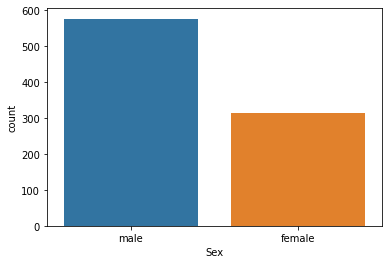

In [82]:
sns.countplot(x='Sex',data=train_data)

there are more male passengers than female on the titanic.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

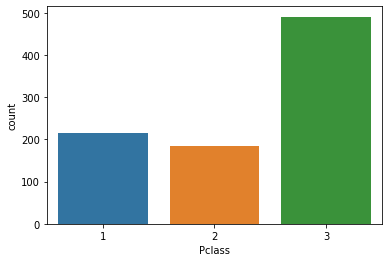

In [83]:
sns.countplot(x='Pclass',data=train_data)

number of 3rd class passengers is way more than 1st & 2nd class.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

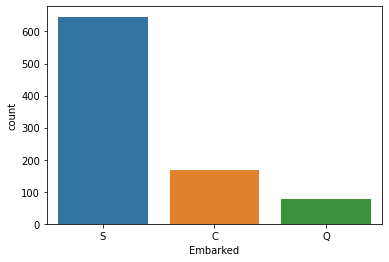

In [84]:
sns.countplot(x='Embarked',data=train_data)

most passengers embarked from port S.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

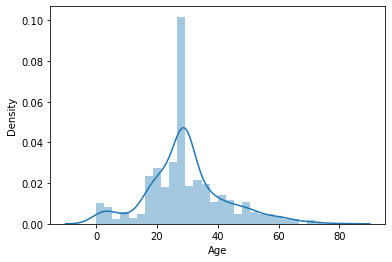

In [85]:
sns.distplot(train_data['Age'])

most passengers are between age 20 & 40.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

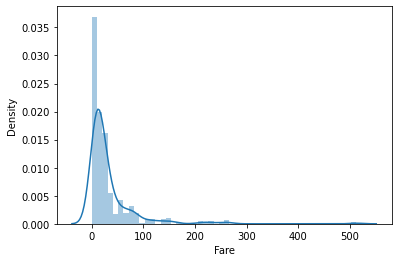

In [86]:
sns.distplot(train_data['Fare'])

most passengers fare are between 0 and 50 , as most passengers are 3rd class.

Let's check the relation between sex and survival.

In [87]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [88]:
sex_vs_survival = train_data.groupby(['Sex','Survived'], as_index = False)['Age'].count()
sex_vs_survival.rename(columns={'Age':'Count'}, inplace=True)
sex_vs_survival.Sex = np.where((sex_vs_survival.Sex=='female') & (sex_vs_survival.Survived==0) ,
                               'Female_Died', sex_vs_survival.Sex)
sex_vs_survival.Sex = np.where((sex_vs_survival.Sex=='female') & (sex_vs_survival.Survived==1) ,
                               'Female_Survived', sex_vs_survival.Sex)
sex_vs_survival.Sex = np.where((sex_vs_survival.Sex=='male') & (sex_vs_survival.Survived==0) ,
                               'Male_Died', sex_vs_survival.Sex)
sex_vs_survival.Sex = np.where((sex_vs_survival.Sex=='male') & (sex_vs_survival.Survived==1) ,
                               'Male_Survived', sex_vs_survival.Sex)
sex_vs_survival

Sex  Survived  Count
0      Female_Died         0     81
1  Female_Survived         1    233
2        Male_Died         0    468
3    Male_Survived         1    109

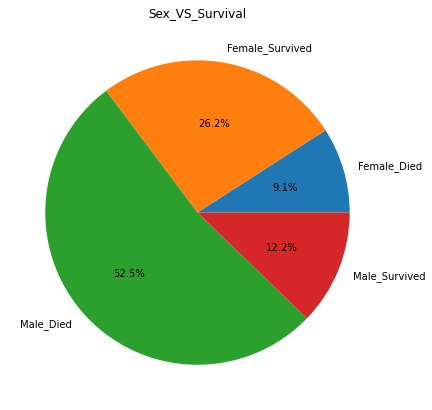

In [89]:
fig = plt.figure(figsize =(10, 7))
plt.pie(sex_vs_survival.Count, labels = sex_vs_survival.Sex, autopct = '%1.1f%%')
plt.title('Sex_VS_Survival')
plt.show() 

Now let's check the relation between the passenger class and survival.

In [90]:
class_vs_surv = train_data.groupby(['Pclass','Survived'], as_index = False)['Age'].count()
class_vs_surv.rename(columns={'Age':'Count'}, inplace=True)
class_vs_surv.Pclass = np.where((class_vs_surv.Pclass==1) & (class_vs_surv.Survived==0) ,
                               '1st_class_died', class_vs_surv.Pclass)
class_vs_surv.Pclass = np.where((class_vs_surv.Pclass=='1') & (class_vs_surv.Survived==1) ,
                               '1st_class_survived', class_vs_surv.Pclass)
class_vs_surv.Pclass = np.where((class_vs_surv.Pclass=='2') & (class_vs_surv.Survived==0) ,
                               '2nd_class_died', class_vs_surv.Pclass)
class_vs_surv.Pclass = np.where((class_vs_surv.Pclass=='2') & (class_vs_surv.Survived==1) ,
                               '2nd_class_survived', class_vs_surv.Pclass)
class_vs_surv.Pclass = np.where((class_vs_surv.Pclass=='3') & (class_vs_surv.Survived==0) ,
                               '3rd_class_died', class_vs_surv.Pclass)
class_vs_surv.Pclass = np.where((class_vs_surv.Pclass=='3') & (class_vs_surv.Survived==1) ,
                               '3rd_class_survived', class_vs_surv.Pclass)
class_vs_surv

Pclass  Survived  Count
0      1st_class_died         0     80
1  1st_class_survived         1    136
2      2nd_class_died         0     97
3  2nd_class_survived         1     87
4      3rd_class_died         0    372
5  3rd_class_survived         1    119

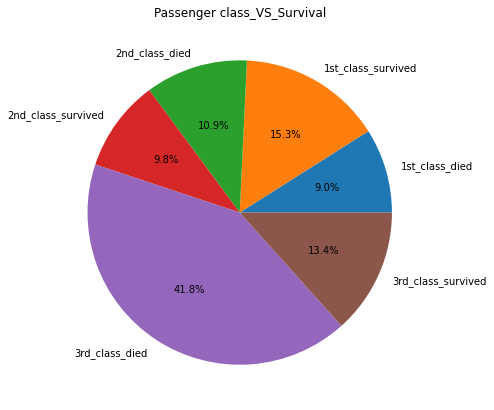

In [91]:
fig = plt.figure(figsize =(10, 7))
plt.pie(class_vs_surv.Count, labels = class_vs_surv.Pclass, autopct = '%1.1f%%')
plt.title('Passenger class_VS_Survival')
plt.show()

Realtion between Age and Survival.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

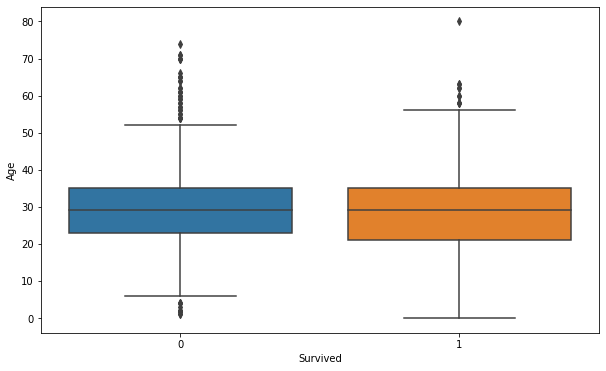

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_data, x='Survived', y='Age')

from the above plot, it seems that there is no clear correlation between survival and age.

<AxesSubplot:xlabel='Survived', ylabel='count'>

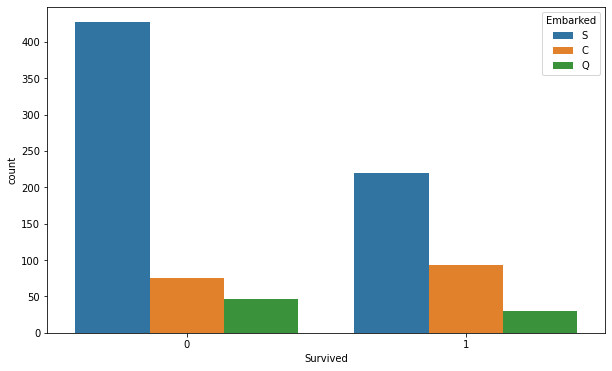

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue='Embarked',data=train_data)

it's shown that most of the survived passengers embarked from port S.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

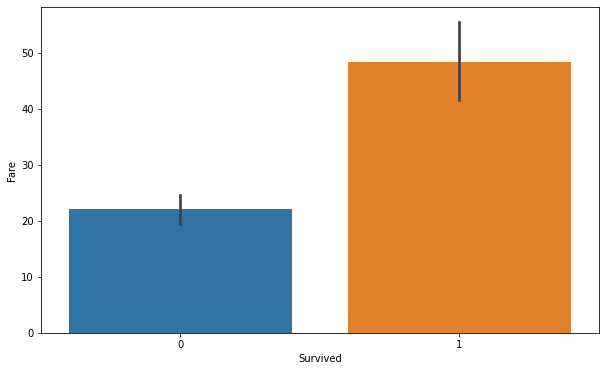

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(data=train_data, x='Survived', y='Fare')

It can be observed that passengers who paid higher fares were much more likely to survive than passengers who did not.

let's check the relation between Age, Sex and survived features.

<AxesSubplot:xlabel='Age', ylabel='Sex'>

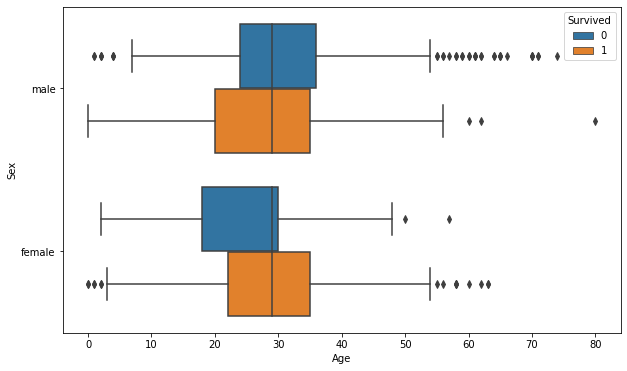

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_data, x='Age', y='Sex', hue ='Survived')

<AxesSubplot:xlabel='Age', ylabel='Sex'>

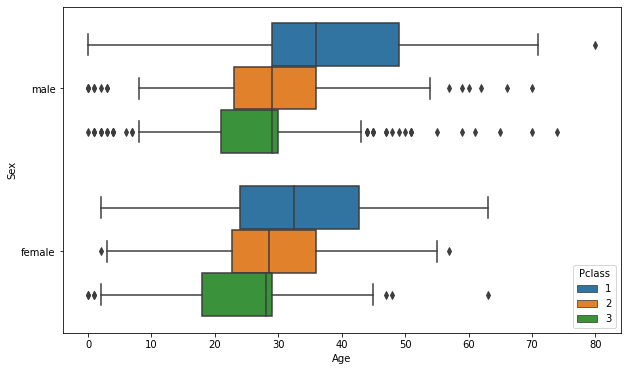

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_data, x='Age', y='Sex', hue ='Pclass')

Most first and second class passengers are older, which makes sense because they would have more money to spend to travel in higher classes

let's check the relationship between the passenger class, fare paid, and survival

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

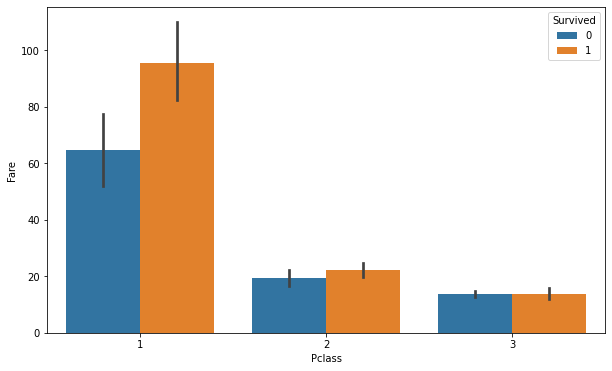

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(data=train_data, x='Pclass', y='Fare', hue ='Survived')

From the visualization above, we can observe two things:

Passengers of a higher class pay a much higher fare than passengers who don’t.

Passengers of a higher class are more likely to survive the Titanic.

Based on the above data analysis, let's build a model to predict survival.

for our purpose we are going to use a classification model, we'll try 4 different models and compare their results to choose the best accuracy.



now let's prepare train_data & test_data

### Pre-procissing

Let's declare the following variables:

- X as the Feature Matrix (data of train_data)

- y as the response vector (target)

In [98]:
from sklearn import preprocessing

X = train_data[['Pclass','Sex','Fare','Embarked','Title','Deck','Family_Size']].values

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['male', 'female'])
X[:,1] = le_sex.transform(X[:,1]) 

le_emb = preprocessing.LabelEncoder()
le_emb.fit([ 'S', 'C', 'Q'])
X[:,3] = le_emb.transform(X[:,3])

le_title = preprocessing.LabelEncoder()
le_title.fit([ 'Mr', 'Miss','Mrs','Master'])
X[:,4] = le_title.transform(X[:,4]) 

le_Deck = preprocessing.LabelEncoder()
le_Deck.fit([ 'Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'])
X[:,5] = le_Deck.transform(X[:,5])

X[0:5]

array([[3, 1, 7.25, 2, 2, 8, 1],
       [1, 0, 71.2833, 0, 3, 2, 1],
       [3, 0, 7.925, 2, 1, 8, 0],
       [1, 0, 53.1, 2, 3, 2, 1],
       [3, 1, 8.05, 2, 2, 8, 0]], dtype=object)

normalize X data

In [99]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.82737724,  0.73769513, -0.50244517,  0.58595414,  0.19311362,
         0.52230912,  0.05915988],
       [-1.56610693, -1.35557354,  0.78684529, -1.9423032 ,  1.58072844,
        -1.91634989,  0.05915988],
       [ 0.82737724, -1.35557354, -0.48885426,  0.58595414, -1.1945012 ,
         0.52230912, -0.56097483],
       [-1.56610693, -1.35557354,  0.42073024,  0.58595414,  1.58072844,
        -1.91634989,  0.05915988],
       [ 0.82737724,  0.73769513, -0.48633742,  0.58595414,  0.19311362,
         0.52230912, -0.56097483]])

In [100]:
y = train_data['Survived']
y[0:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

now let's split our training data to testing and training data.

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (623, 7) (623,)
Test set: (268, 7) (268,)


#### Machine learning models.

### 1- K-Nearest Neighbors

first let's identify the optimum value of k.


In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.81716418, 0.82462687, 0.84328358, 0.84701493, 0.83955224,
       0.84701493, 0.8358209 , 0.85074627, 0.85820896, 0.85447761,
       0.85447761])

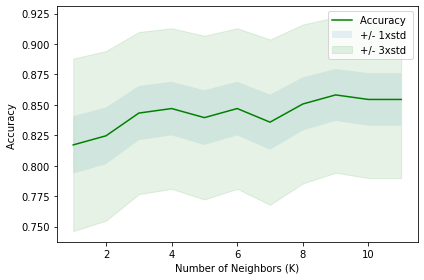

In [103]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

from the above figure and mean_acc values, the optimum value of k is 9

now let's build the model.

In [104]:
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat_neigh = neigh.predict(X_test)
yhat_neigh[0:5]

array([0, 0, 1, 1, 0])

Accuracy evaluation.

In [105]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_neigh))

Train set Accuracy:  0.8314606741573034
Test set Accuracy:  0.8582089552238806


### 2- Decision Trees

In [106]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
tree = tr.fit(X_train, y_train)
yhat_tree = tree.predict(X_test)
yhat_tree[0:5]

array([0, 0, 1, 1, 0])

Accuracy :

In [107]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

DecisionTrees's Accuracy:  0.8768656716417911


### 3- Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LR = LR.predict(X_test)
yhat_LR[0:5]

array([0, 0, 1, 1, 0])

Accuracy :

In [109]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))
print('Jaccard index = ',jaccard_score(y_test, yhat_LR,pos_label=0))
print('F1 score is = ',f1_score(y_test, yhat_LR, average='weighted'))
yhat_LR_prob = LR.predict_proba(X_test)
print('Log Loss = ', log_loss(y_test, yhat_LR_prob))

Logistic Regression's Accuracy:  0.7761194029850746
Jaccard index =  0.7101449275362319
F1 score is =  0.7767170850904724
Log Loss =  0.4809247590849773


### 4- Support Vector Machine (SVM)

In [110]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf').fit(X_train, y_train)
yhat_SVM = SVM.predict(X_test)
yhat_SVM[0:5]

array([0, 0, 1, 1, 0])

Accuracy :

In [111]:
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat_SVM))
print('Jaccard index = ',jaccard_score(y_test, yhat_SVM,pos_label=0))
print('F1 score is = ',f1_score(y_test, yhat_SVM, average='weighted'))

SVM's Accuracy:  0.8731343283582089
Jaccard index =  0.8349514563106796
F1 score is =  0.8679937663500861


In [112]:
from tabulate import tabulate

table = [[' ','KNN','Decision Tree','Logistic Regression','SVM'],
        ['Model Accuraccy',metrics.accuracy_score(y_test, yhat_neigh), 
         metrics.accuracy_score(y_test, yhat_tree), metrics.accuracy_score(y_test, yhat_LR),
         metrics.accuracy_score(y_test, yhat_SVM)]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════╤══════════╤═════════════════╤═══════════════════════╤══════════╕
│                 │      KNN │   Decision Tree │   Logistic Regression │      SVM │
╞═════════════════╪══════════╪═════════════════╪═══════════════════════╪══════════╡
│ Model Accuraccy │ 0.858209 │        0.876866 │              0.776119 │ 0.873134 │
╘═════════════════╧══════════╧═════════════════╧═══════════════════════╧══════════╛


based on the above results we'll use SVM model as it is the higher accuracy.

Now let's predict the test_data using SVM model to check whether the passengers survived or not.

In [113]:
z = test_data[['Pclass','Sex','Fare','Embarked','Title','Deck','Family_Size']].values

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['male', 'female'])
z[:,1] = le_sex.transform(z[:,1]) 

le_emb = preprocessing.LabelEncoder()
le_emb.fit([ 'S', 'C', 'Q'])
z[:,3] = le_emb.transform(z[:,3])

le_title = preprocessing.LabelEncoder()
le_title.fit([ 'Mr', 'Miss','Mrs','Master'])
z[:,4] = le_title.transform(z[:,4]) 

le_Deck = preprocessing.LabelEncoder()
le_Deck.fit([ 'Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'])
z[:,5] = le_Deck.transform(z[:,5])

z[0:5]

array([[3, 1, 7.8292, 1, 2, 8, 0],
       [3, 0, 7.0, 2, 3, 8, 1],
       [2, 1, 9.6875, 1, 2, 8, 0],
       [3, 1, 8.6625, 2, 2, 8, 0],
       [3, 0, 12.2875, 2, 3, 8, 2]], dtype=object)

In [114]:
z = preprocessing.StandardScaler().fit(z).transform(z.astype(float))
z[0:5]

array([[ 0.87348191,  0.75592895, -0.49840706, -0.47091535,  0.15464251,
         0.50969764, -0.5534426 ],
       [ 0.87348191, -1.32287566, -0.51327429,  0.70076689,  1.50132107,
         0.50969764,  0.10564289],
       [-0.31581919,  0.75592895, -0.46508846, -0.47091535,  0.15464251,
         0.50969764, -0.5534426 ],
       [ 0.87348191,  0.75592895, -0.48346631,  0.70076689,  0.15464251,
         0.50969764, -0.5534426 ],
       [ 0.87348191, -1.32287566, -0.41847148,  0.70076689,  1.50132107,
         0.50969764,  0.76472838]])

In [115]:
survivals = SVM.predict(z)
survivals[0:5]

array([0, 0, 0, 0, 0])

In [116]:
test_data['Survived'] = survivals
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare    Cabin Embarked     Deck Title  \
0  34.5      0      0   330911   7.8292  Unknown        Q  Unknown    Mr   
1  47.0      1      0   363272   7.0000  Unknown        S  Unknown   Mrs   
2  62.0      0      0   240276   9.6875  Unknown        Q  Unknown    Mr   
3  27.0      0      0   315154   8.6625  Unknown        S  Unknown    Mr   
4  22.0      1      1  3101298  12.2875  Unknown        S  Unknown   Mrs   

   Family_Size  Survived  
0            0         0  
1            1         0  
2            0         0  
3            0         0  
4            2         0

In [117]:
test_data['Survived'].value_counts()

0    289
1    129
Name: Survived, dtype: int64

In [118]:
output = test_data.filter(['PassengerId', 'Survived'], axis=1)
output.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [119]:
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
